# Hamidreza Ghadiri 400125082

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Read Data

In [11]:
df=pd.read_excel("C:/Users/NJ/Desktop/Australian.xlsx")
df=df.drop(labels=['ID'], axis=1)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,Y
0,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [12]:
x=df.drop(labels=['Y'], axis=1)
y=df['Y']

# Information gain

In [13]:
#x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['credit_risk'], axis=1),
    #df['credit_risk'],
    #test_size=0.34,
    #random_state=0)

In [14]:
mutual_info_list=list()
feature=list()
for i in range (20):
    mutual_info = mutual_info_classif(x,y)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = x.columns
    mutual_info=mutual_info.sort_values(ascending=False)
    for j in range(8):
        feature.append(mutual_info.index[j])
    mutual_info_list.append(mutual_info)
final=collections.Counter(feature)
final=pd.Series(final)
final=final.sort_values(ascending=False)
final_ig=final[0:8]

In [15]:
final_ig

A6     20
A13    20
A8     20
A9     20
A7     20
A4     18
A12    15
A5     12
dtype: int64

<AxesSubplot:>

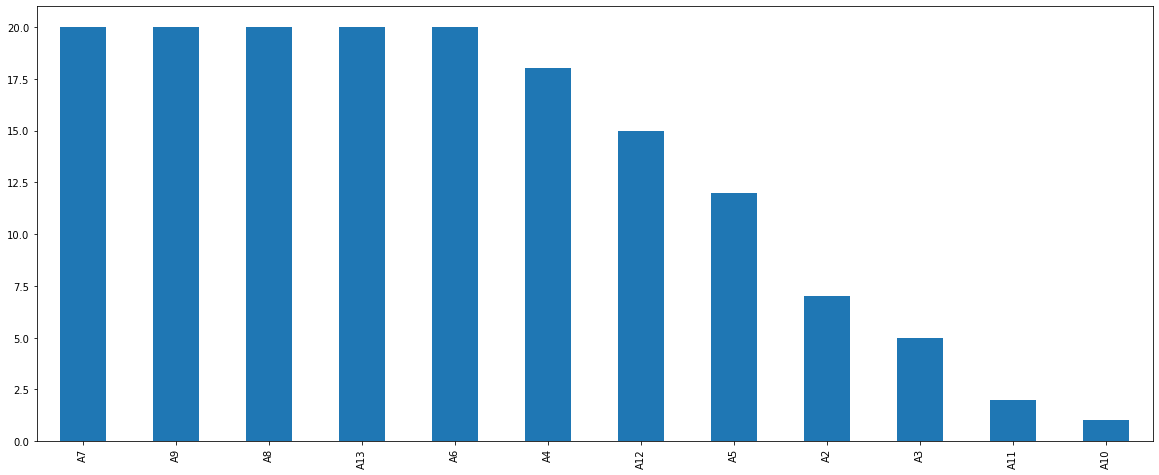

In [16]:
final.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# Gain ratio

In [17]:
def entropy(labels):
    ps = np.bincount(labels) / len(labels)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

In [18]:
e=list()
for i in range (13):
    e.append(entropy(x[x.columns[i]]))
e

[5.2853890749386485,
 3.638658894630253,
 0.8162006158245961,
 3.496440211804626,
 1.7813277179145888,
 2.5747931053773483,
 0.9984479628754399,
 0.9847953334568664,
 2.5273592592706278,
 0.9948971249670666,
 0.5010395545266965,
 5.736048757235469,
 5.185190751955471]

In [20]:
gain_ratio_list=list()
feature=list()
for i in range (20):
    gain_ratio = mutual_info_classif(x,y)/e
    gain_ratio = pd.Series(gain_ratio)
    gain_ratio.index = x.columns
    gain_ratio=gain_ratio.sort_values(ascending=False)
    for j in range(8):
        feature.append(gain_ratio.index[j])
    gain_ratio_list.append(gain_ratio)
final2=collections.Counter(feature)
final2=pd.Series(final2)
final2=final2.sort_values(ascending=False)
final_gr=final2[0:8]

In [21]:
final_gr

A6     20
A9     20
A8     20
A7     20
A13    18
A4     16
A3     15
A5     13
dtype: int64

<AxesSubplot:>

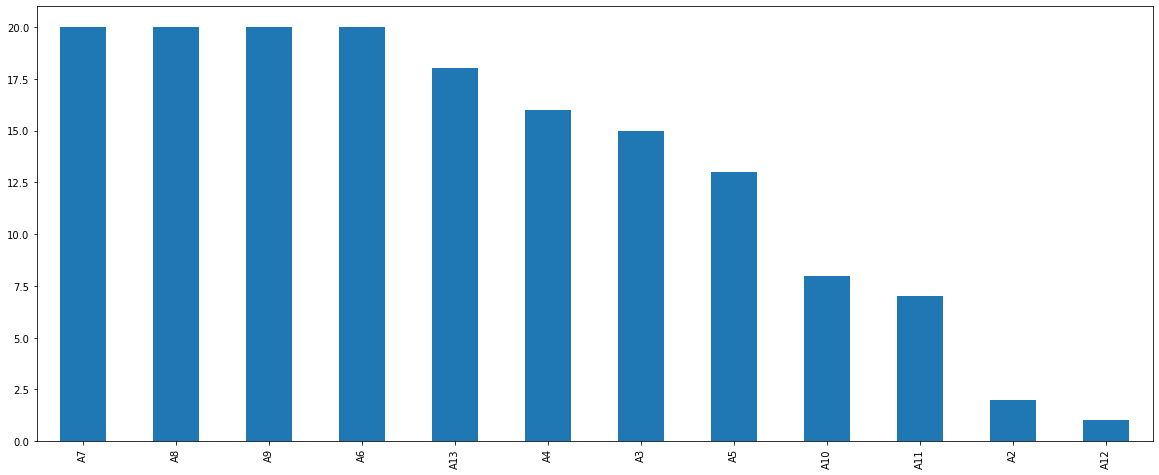

In [22]:
final2.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# Chi square

In [23]:
f_p_values=chi2(x,y)
f_p_values

(array([8.01064803e+01, 1.52699990e+02, 2.72333548e+00, 1.77070268e+02,
        3.54306863e+01, 3.60893186e+02, 1.70746388e+02, 8.29658437e+01,
        1.12133299e+03, 3.74048205e-01, 4.23695318e-01, 1.10914504e+03,
        5.66671641e+05]),
 array([3.54766993e-019, 4.45492159e-035, 9.88911687e-002, 2.11411273e-040,
        2.64290080e-009, 1.79926842e-080, 5.08335034e-039, 8.34835321e-020,
        7.62644078e-246, 5.40805876e-001, 5.15098888e-001, 3.39836740e-243,
        0.00000000e+000]))

In [24]:
p_values=pd.Series(f_p_values[1])
p_values.index=x.columns
p_values

A1      3.547670e-19
A2      4.454922e-35
A3      9.889117e-02
A4      2.114113e-40
A5      2.642901e-09
A6      1.799268e-80
A7      5.083350e-39
A8      8.348353e-20
A9     7.626441e-246
A10     5.408059e-01
A11     5.150989e-01
A12    3.398367e-243
A13     0.000000e+00
dtype: float64

In [25]:
p_values.sort_values(ascending=False)

A10     5.408059e-01
A11     5.150989e-01
A3      9.889117e-02
A5      2.642901e-09
A1      3.547670e-19
A8      8.348353e-20
A2      4.454922e-35
A7      5.083350e-39
A4      2.114113e-40
A6      1.799268e-80
A12    3.398367e-243
A9     7.626441e-246
A13     0.000000e+00
dtype: float64

In [26]:
final3=pd.Series(p_values)
final3=final3.sort_values(ascending=False)
final_ch=final3[0:15]
final_ch

A10     5.408059e-01
A11     5.150989e-01
A3      9.889117e-02
A5      2.642901e-09
A1      3.547670e-19
A8      8.348353e-20
A2      4.454922e-35
A7      5.083350e-39
A4      2.114113e-40
A6      1.799268e-80
A12    3.398367e-243
A9     7.626441e-246
A13     0.000000e+00
dtype: float64

<AxesSubplot:>

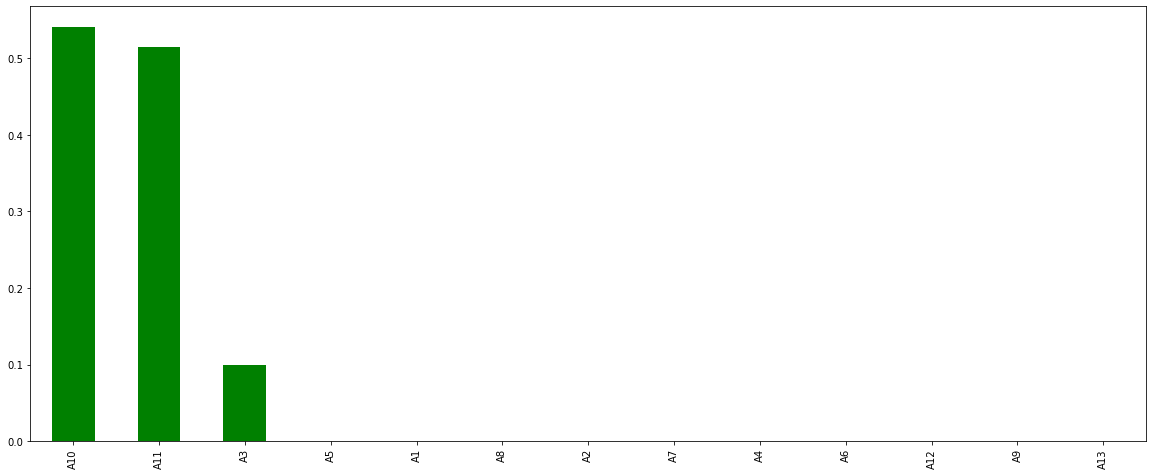

In [27]:
p_values.sort_values(ascending=False).plot.bar(figsize=(20, 8),color="g")

In [28]:
x_ig=x[final_ig.keys()]
x_gr=x[final_gr.keys()]
x_ch=x[final_ch.keys()]
features=list()
features.append(x_ig)
features.append(x_gr)
features.append(x_ch)
features.append(x)
metrics={"accuracy","precision","recall","f1"}
features_methods={"ig","gr","ch","all"}
classifiers={"bay","com","svm","dtc","rfc"}
kf = KFold(n_splits=10)

In [29]:
import warnings
warnings.filterwarnings("ignore")

# GaussianNB

In [30]:
accuracy_bay=list()
precision_bay=list()
recall_bay=list()
f1_bay=list()
for i in features:
    bay = GaussianNB()
    accuracy_bay.append(cross_val_score(bay, i, y, scoring="accuracy", cv=kf))
    precision_bay.append(cross_val_score(bay, i, y, scoring="precision", cv=kf))
    recall_bay.append(cross_val_score(bay, i, y, scoring="recall", cv=kf))
    f1_bay.append(cross_val_score(bay, i, y, scoring="f1", cv=kf))

# ComplementNB

In [31]:
accuracy_com=list()
precision_com=list()
recall_com=list()
f1_com=list()
for i in features:
    com = ComplementNB()
    accuracy_com.append(cross_val_score(com, i, y, scoring="accuracy", cv=kf))
    precision_com.append(cross_val_score(com, i, y, scoring="precision", cv=kf))
    recall_com.append(cross_val_score(com, i, y, scoring="recall", cv=kf))
    f1_com.append(cross_val_score(com, i, y, scoring="f1", cv=kf))

# SVM-RBF

In [32]:
accuracy_svm=list()
precision_svm=list()
recall_svm=list()
f1_svm=list()
for i in features:
    svm = SVC(kernel= 'rbf')
    accuracy_svm.append(cross_val_score(svm, i, y, scoring="accuracy", cv=kf))
    precision_svm.append(cross_val_score(svm, i, y, scoring="precision", cv=kf))
    recall_svm.append(cross_val_score(svm, i, y, scoring="recall", cv=kf))
    f1_svm.append(cross_val_score(svm, i, y, scoring="f1", cv=kf))

# Decision Tree

In [33]:
accuracy_dtc=list()
precision_dtc=list()
recall_dtc=list()
f1_dtc=list()
for i in features:
    dtc = DecisionTreeClassifier()
    array_ac=np.array([])
    array_pr=np.array([])
    array_re=np.array([])
    array_f1=np.array([])
    for j in range(10):
        array_ac=np.append(array_ac,np.mean(cross_val_score(dtc, i, y, scoring="accuracy", cv=kf)))
        array_pr=np.append(array_pr,np.mean(cross_val_score(dtc, i, y, scoring="precision", cv=kf)))
        array_re=np.append(array_re,np.mean(cross_val_score(dtc, i, y, scoring="recall", cv=kf)))
        array_f1=np.append(array_f1,np.mean(cross_val_score(dtc, i, y, scoring="f1", cv=kf)))
    accuracy_dtc.append(array_ac)
    precision_dtc.append(array_pr)
    recall_dtc.append(array_re)
    f1_dtc.append(array_f1)

# Random Forest

In [43]:
accuracy_rfc=list()
precision_rfc=list()
recall_rfc=list()
f1_rfc=list()
for i in features:
    rfc = RandomForestClassifier()
    array_ac=np.array([])
    array_pr=np.array([])
    array_re=np.array([])
    array_f1=np.array([])
    for j in range(10):
        array_ac=np.append(array_ac,np.mean(cross_val_score(rfc, i, y, scoring="accuracy", cv=kf)))
        array_pr=np.append(array_pr,np.mean(cross_val_score(rfc, i, y, scoring="precision", cv=kf)))
        array_re=np.append(array_re,np.mean(cross_val_score(rfc, i, y, scoring="recall", cv=kf)))
        array_f1=np.append(array_f1,np.mean(cross_val_score(rfc, i, y, scoring="f1", cv=kf)))
    accuracy_rfc.append(array_ac)
    precision_rfc.append(array_pr)
    recall_rfc.append(array_re)
    f1_rfc.append(array_f1)

# Result

In [44]:
table_ac=pd.DataFrame(index=classifiers,columns=features_methods)
table_pr=pd.DataFrame(index=classifiers,columns=features_methods)
table_re=pd.DataFrame(index=classifiers,columns=features_methods)
table_f1=pd.DataFrame(index=classifiers,columns=features_methods)

In [45]:
table_ac["ig"]["com"]=np.mean(accuracy_com[0])*100
table_ac["gr"]["com"]=np.mean(accuracy_com[1])*100
table_ac["ch"]["com"]=np.mean(accuracy_com[2])*100
table_ac["all"]["com"]=np.mean(accuracy_com[3])*100
table_ac["ig"]["rfc"]=np.mean(accuracy_rfc[0])*100
table_ac["gr"]["rfc"]=np.mean(accuracy_rfc[1])*100
table_ac["ch"]["rfc"]=np.mean(accuracy_rfc[2])*100
table_ac["all"]["rfc"]=np.mean(accuracy_rfc[3])*100
table_ac["ig"]["bay"]=np.mean(accuracy_bay[0])*100
table_ac["gr"]["bay"]=np.mean(accuracy_bay[1])*100
table_ac["ch"]["bay"]=np.mean(accuracy_bay[2])*100
table_ac["all"]["bay"]=np.mean(accuracy_bay[3])*100
table_ac["ig"]["svm"]=np.mean(accuracy_svm[0])*100
table_ac["gr"]["svm"]=np.mean(accuracy_svm[1])*100
table_ac["ch"]["svm"]=np.mean(accuracy_svm[2])*100
table_ac["all"]["svm"]=np.mean(accuracy_svm[3])*100
table_ac["ig"]["dtc"]=np.mean(accuracy_dtc[0])*100
table_ac["gr"]["dtc"]=np.mean(accuracy_dtc[1])*100
table_ac["ch"]["dtc"]=np.mean(accuracy_dtc[2])*100
table_ac["all"]["dtc"]=np.mean(accuracy_dtc[3])*100
table_ac

,gr,all,ig,ch
dtc,79.5942,80.3768,80.1159,80.6667
svm,65.2174,65.2174,65.2174,65.2174
bay,78.6957,78.4058,78.9855,78.4058
com,65.3623,66.9565,66.9565,66.9565
rfc,84.0145,86.4203,85.2899,86.2319


In [46]:
table_pr["ig"]["com"]=np.mean(precision_com[0])*100
table_pr["gr"]["com"]=np.mean(precision_com[1])*100
table_pr["ch"]["com"]=np.mean(precision_com[2])*100
table_pr["all"]["com"]=np.mean(precision_com[3])*100
table_pr["ig"]["rfc"]=np.mean(precision_rfc[0])*100
table_pr["gr"]["rfc"]=np.mean(precision_rfc[1])*100
table_pr["ch"]["rfc"]=np.mean(precision_rfc[2])*100
table_pr["all"]["rfc"]=np.mean(precision_rfc[3])*100
table_pr["ig"]["bay"]=np.mean(precision_bay[0])*100
table_pr["gr"]["bay"]=np.mean(precision_bay[1])*100
table_pr["ch"]["bay"]=np.mean(precision_bay[2])*100
table_pr["all"]["bay"]=np.mean(precision_bay[3])*100
table_pr["ig"]["svm"]=np.mean(precision_svm[0])*100
table_pr["gr"]["svm"]=np.mean(precision_svm[1])*100
table_pr["ch"]["svm"]=np.mean(precision_svm[2])*100
table_pr["all"]["svm"]=np.mean(precision_svm[3])*100
table_pr["ig"]["dtc"]=np.mean(precision_dtc[0])*100
table_pr["gr"]["dtc"]=np.mean(precision_dtc[1])*100
table_pr["ch"]["dtc"]=np.mean(precision_dtc[2])*100
table_pr["all"]["dtc"]=np.mean(precision_dtc[3])*100
table_pr

,gr,all,ig,ch
dtc,76.128,79.1696,77.7067,78.9142
svm,74.9562,74.9562,74.9562,74.9562
bay,86.97,85.5726,87.1433,85.5726
com,71.0134,71.61,71.1565,71.61
rfc,81.688,84.6524,83.2051,84.9889


In [47]:
table_re["ig"]["com"]=np.mean(recall_com[0])*100
table_re["gr"]["com"]=np.mean(recall_com[1])*100
table_re["ch"]["com"]=np.mean(recall_com[2])*100
table_re["all"]["com"]=np.mean(recall_com[3])*100
table_re["ig"]["rfc"]=np.mean(recall_rfc[0])*100
table_re["gr"]["rfc"]=np.mean(recall_rfc[1])*100
table_re["ch"]["rfc"]=np.mean(recall_rfc[2])*100
table_re["all"]["rfc"]=np.mean(recall_rfc[3])*100
table_re["ig"]["bay"]=np.mean(recall_bay[0])*100
table_re["gr"]["bay"]=np.mean(recall_bay[1])*100
table_re["ch"]["bay"]=np.mean(recall_bay[2])*100
table_re["all"]["bay"]=np.mean(recall_bay[3])*100
table_re["ig"]["svm"]=np.mean(recall_svm[0])*100
table_re["gr"]["svm"]=np.mean(recall_svm[1])*100
table_re["ch"]["svm"]=np.mean(recall_svm[2])*100
table_re["all"]["svm"]=np.mean(recall_svm[3])*100
table_re["ig"]["dtc"]=np.mean(recall_dtc[0])*100
table_re["gr"]["dtc"]=np.mean(recall_dtc[1])*100
table_re["ch"]["dtc"]=np.mean(recall_dtc[2])*100
table_re["all"]["dtc"]=np.mean(recall_dtc[3])*100
table_re

,gr,all,ig,ch
dtc,78.1389,77.7906,78.1107,77.7875
svm,29.5907,29.5907,29.5907,29.5907
bay,61.6868,62.3636,62.3948,62.3636
com,33.3578,40.2786,41.9644,40.2786
rfc,83.4812,85.5251,84.1396,84.7283


In [48]:
table_f1["ig"]["com"]=np.mean(f1_com[0])*100
table_f1["gr"]["com"]=np.mean(f1_com[1])*100
table_f1["ch"]["com"]=np.mean(f1_com[2])*100
table_f1["all"]["com"]=np.mean(f1_com[3])*100
table_f1["ig"]["rfc"]=np.mean(f1_rfc[0])*100
table_f1["gr"]["rfc"]=np.mean(f1_rfc[1])*100
table_f1["ch"]["rfc"]=np.mean(f1_rfc[2])*100
table_f1["all"]["rfc"]=np.mean(f1_rfc[3])*100
table_f1["ig"]["bay"]=np.mean(f1_bay[0])*100
table_f1["gr"]["bay"]=np.mean(f1_bay[1])*100
table_f1["ch"]["bay"]=np.mean(f1_bay[2])*100
table_f1["all"]["bay"]=np.mean(f1_bay[3])*100
table_f1["ig"]["svm"]=np.mean(f1_svm[0])*100
table_f1["gr"]["svm"]=np.mean(f1_svm[1])*100
table_f1["ch"]["svm"]=np.mean(f1_svm[2])*100
table_f1["all"]["svm"]=np.mean(f1_svm[3])*100
table_f1["ig"]["dtc"]=np.mean(f1_dtc[0])*100
table_f1["gr"]["dtc"]=np.mean(f1_dtc[1])*100
table_f1["ch"]["dtc"]=np.mean(f1_dtc[2])*100
table_f1["all"]["dtc"]=np.mean(f1_dtc[3])*100
table_f1

,gr,all,ig,ch
dtc,76.9074,77.8469,77.422,78.0799
svm,41.5468,41.5468,41.5468,41.5468
bay,71.565,71.5286,72.1748,71.5286
com,44.3481,51.087,52.4378,51.087
rfc,82.0252,84.7595,83.3378,84.764


In [49]:
table_ac.to_excel("C:/Users/NJ/Desktop/table_ac.xlsx")
table_pr.to_excel("C:/Users/NJ/Desktop/table_pr.xlsx")
table_re.to_excel("C:/Users/NJ/Desktop/table_re.xlsx")
table_f1.to_excel("C:/Users/NJ/Desktop/table_f1.xlsx")

In [157]:
accuracy_rfc1=pd.DataFrame(accuracy_rfc)
precision_rfc1=pd.DataFrame(precision_rfc)
recall_rfc1=pd.DataFrame(recall_rfc)
f1_rfc1=pd.DataFrame(f1_rfc)
accuracy_rfc1.to_excel("C:/Users/NJ/Desktop/accuracy_rfc1.xlsx")
precision_rfc1.to_excel("C:/Users/NJ/Desktop/precision_rfc1.xlsx")
recall_rfc1.to_excel("C:/Users/NJ/Desktop/recall_rfc1.xlsx")
f1_rfc1.to_excel("C:/Users/NJ/Desktop/f1_rfc1.xlsx")

In [158]:
accuracy_dtc1=pd.DataFrame(accuracy_dtc)
precision_dtc1=pd.DataFrame(precision_dtc)
recall_dtc1=pd.DataFrame(recall_dtc)
f1_dtc1=pd.DataFrame(f1_dtc)
accuracy_dtc1.to_excel("C:/Users/NJ/Desktop/accuracy_dtc1.xlsx")
precision_dtc1.to_excel("C:/Users/NJ/Desktop/precision_dtc1.xlsx")
recall_dtc1.to_excel("C:/Users/NJ/Desktop/recall_dtc1.xlsx")
f1_dtc1.to_excel("C:/Users/NJ/Desktop/f1_dtc1.xlsx")

In [159]:
accuracy_svm1=pd.DataFrame(accuracy_svm)
precision_svm1=pd.DataFrame(precision_svm)
recall_svm1=pd.DataFrame(recall_svm)
f1_svm1=pd.DataFrame(f1_svm)
accuracy_svm1.to_excel("C:/Users/NJ/Desktop/accuracy_svm1.xlsx")
precision_svm1.to_excel("C:/Users/NJ/Desktop/precision_svm1.xlsx")
recall_svm1.to_excel("C:/Users/NJ/Desktop/recall_svm1.xlsx")
f1_svm1.to_excel("C:/Users/NJ/Desktop/f1_svm1.xlsx")

In [160]:
accuracy_bay1=pd.DataFrame(accuracy_bay)
precision_bay1=pd.DataFrame(precision_bay)
recall_bay1=pd.DataFrame(recall_bay)
f1_bay1=pd.DataFrame(f1_bay)
accuracy_bay1.to_excel("C:/Users/NJ/Desktop/accuracy_bay1.xlsx")
precision_bay1.to_excel("C:/Users/NJ/Desktop/precision_bay1.xlsx")
recall_bay1.to_excel("C:/Users/NJ/Desktop/recall_bay1.xlsx")
f1_bay1.to_excel("C:/Users/NJ/Desktop/f1_bay1.xlsx")

In [161]:
accuracy_com1=pd.DataFrame(accuracy_com)
precision_com1=pd.DataFrame(precision_com)
recall_com1=pd.DataFrame(recall_com)
f1_com1=pd.DataFrame(f1_com)
accuracy_com1.to_excel("C:/Users/NJ/Desktop/accuracy_com1.xlsx")
precision_com1.to_excel("C:/Users/NJ/Desktop/precision_com1.xlsx")
recall_com1.to_excel("C:/Users/NJ/Desktop/recall_com1.xlsx")
f1_com1.to_excel("C:/Users/NJ/Desktop/f1_com1.xlsx")